# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA

## Carga de datos y preevaluación de datos

In [2]:
# Cargar dataset de ofertas relámpago en un DataFrame
path = "../Data/ofertas_relampago.csv"
df = pd.read_csv(path)

In [3]:
# Evaluar cantidad de registros y columnas
registros = df.shape[0]
columnas = df.shape[1]
print(f"Cantidad de registros: {registros}\nCantidad de columnas: {columnas}")

Cantidad de registros: 48746
Cantidad de columnas: 13


In [4]:
# Evaluar primeros 3 registros
df.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


In [5]:
# Evaluar columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

**Se observan las columnas con sus distintos tipos de datos, que serán evaluados posteriormente. Además, se encuentran valores nulos en 3 columnas.**

In [6]:
# Evaluar nulos
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

**Las columnas "SOLD_AMOUNT", "SOLD_QUANTITY" y "ORIGIN" contienen nulos.**

In [7]:
# Evaluar estadísticas descriptivas de atributos numéricos
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [8]:
# Evaluar duplicados
duplicados = df.duplicated()
duplicados.sum()

926

**Se encuentran 926 duplicados.**

## Evaluar duplicados

**Investigar duplicados para entender si es necesario eliminarlos.**

In [9]:
# Ver duplicados en orden
df[df.duplicated(keep=False)].sort_values(by=[col for col in df.columns])

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
39626,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39640,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39629,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39630,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
40007,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23460,2021-07-31,2021-07-31 16:00:00+00:00,2021-08-01 00:00:00+00:00,lightning_deal,5,5,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-RANGES
24399,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
24401,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
23423,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:05+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-MUSIC_ALBUMS


**Al tener duplicados que son iguales en todas las columnas, se eliminan para evitar redundancia, ya que no aportan información nueva y solo aumentan el tamaño de la tabla.**

**Además, al COMPLETAR!

In [10]:
registros

48746

In [11]:
df.drop_duplicates(keep="first", inplace=True)

In [12]:
df.shape[0]

47820

In [13]:
# Verificar que se eliminaron los duplicados
df.duplicated(keep=False).any()

False

## Evaluar nulos

## Analizar valores y distribución de variables

In [14]:
# Ver columnas y tipos de datos
df.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

**Columna "OFFER_START_DATE"**

**Columna parece representar las fechas en las cuales inicia cada oferta relámpago.**
**Se importó como tipo Object, y luego debería castearse a tipo Datetime.**

In [17]:
# Imprimir tipo Object
print(df["OFFER_START_DATE"].dtype)

# Castear "OFFER_START_DATE" a tipo Datetime
df["OFFER_START_DATE"] = pd.to_datetime(df["OFFER_START_DATE"])

# Verificar cambio de tipo de dato
print(df["OFFER_START_DATE"].dtype)

object
datetime64[ns]


In [18]:
df["OFFER_START_DATE"].isna().any()

False

**No contiene nulos, por lo tanto, cada oferta tiene su inicio.**

In [34]:
# Verificar rango de fechas
print("Fecha máxima")
print(df["OFFER_START_DATE"].max())

print("\nFecha mínima")
print(df["OFFER_START_DATE"].min())

Fecha máxima
2021-07-31 00:00:00

Fecha mínima
2021-06-01 00:00:00


**La fecha de inicio de las ofertas relámpago cubre el período de 2 meses, junio y julio del 2021.**

**La ventana de estos 2 meses abarca el cambio de otoño a invierno en Argentina, posiblemente influenciando las categorías y productos de las ofertas.**

**Además, el rango toma casi la totalidad de las vacaciones de invierno en Argentina (21 hasta 30 de julio), posiblemente apuntando a la mayor disponibilidad horaria de niños, adolescentes y adultos (profesores, padres/madres y trabajadores que se tomen vacaciones en esta época).**

In [40]:
# Observar frecuencia de fechas
frec_offer_start_date = df["OFFER_START_DATE"].value_counts()
frec_offer_start_date

OFFER_START_DATE
2021-07-30    1290
2021-07-29    1285
2021-07-08    1219
2021-07-31    1201
2021-07-28    1196
              ... 
2021-06-07     411
2021-06-06     410
2021-06-09     363
2021-06-08     312
2021-06-30     250
Name: count, Length: 61, dtype: int64

**El 30 de julio del 2021 fue cuando más ofertas únicas comenzaron, seguido del 29, 8, 31 y 28 del mismo mes y año.**

**De las primeras 5 fechas más frecuentes, 4 fechas caen durante las vacaciones de invierno en Argentina, posiblemente apuntando a maximizar ventas a partir de ofertas, aprovechando las vacaciones.**

**Es relevante evaluar posteriormente, al analizar las otras variables, si las ventas efectivamente aumentan en el rango de las vacaciones de invierno, para poder confirmar el potencial comportamiento de los clientes, para finalmente recomendar campañas de marketing y ofertas durante esta época.**

**Las 5 fechas menos frecuentes suceden todas en junio, posiblemente indicando que los clientes prefieren comprar cerca de sus vacaciones.**

**Por otro lado, sería relevante evaluar otros meses del año, para tener un mejor entendimiento del comportamiento de compra de los clientes. Además, a la hora de realizar un modelo de Machine Learning, entrenado exclusivamente con estos datos, podría generalizar mal al sobreestimar la demanda en meses que estén fuera de vacaciones.**

**Además, al observar que las fechas con el menor inicio de ofertas ocurren en junio, indica la existencia de una oportunidad para intentar aumentar las ventas en junio, debido a la diferencia competitiva entre meses. Se podrían aumentar las ofertas para evaluar posteriormente la efectividad de ofrecer ofertas previas a las vacaciones. Es posible que si hay pocas ofertas, exista una relación con un comportamiento de los usuarios donde esperan los descuentos en julio.**

In [ ]:
# Evaluar distribución de "OFFER_START_DATE"


In [ ]:
df["OFFER_START_DATE"]

In [35]:
# Comparar diferencias de ventas entre junio y julio

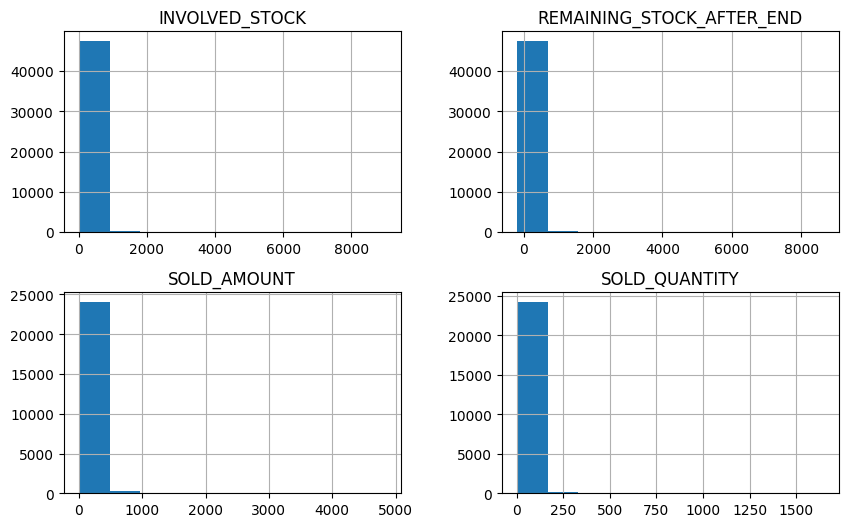

In [51]:
# Histogramas de variables numéricas
df.hist(figsize=(10,6));

In [53]:
# Evaluar variables categóricas
df.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

* Revisar tipos de datos
* Evaluar casteos
* Armar countplots de variables categóricas y de torta
* Armar gráficos temporales
* Armar variables dummies

In [54]:
df["OFFER_START_DATE"]

0        2021-06-22
1        2021-06-22
2        2021-06-22
3        2021-06-22
4        2021-06-22
            ...    
48741    2021-06-19
48742    2021-06-19
48743    2021-06-19
48744    2021-06-19
48745    2021-06-19
Name: OFFER_START_DATE, Length: 47820, dtype: object

array([[<Axes: title={'center': 'INVOLVED_STOCK'}>,
        <Axes: title={'center': 'REMAINING_STOCK_AFTER_END'}>],
       [<Axes: title={'center': 'SOLD_AMOUNT'}>,
        <Axes: title={'center': 'SOLD_QUANTITY'}>]], dtype=object)

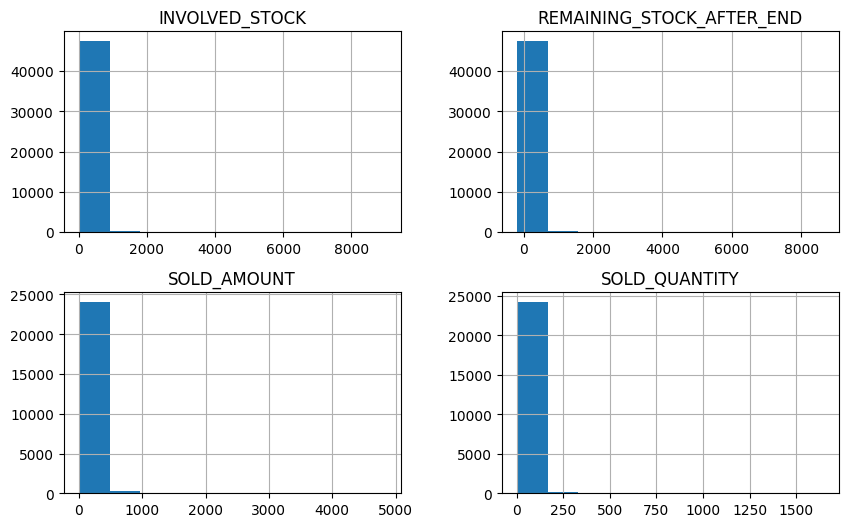

## Evaluar outliers

## Evaluar correlaciones

In [19]:
# Evaluar correlaciones de atributos numéricos
df_numeric = df.select_dtypes(include=["float64", "int64"])
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.994240,0.405859,0.557684
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.354320,0.484031
SOLD_AMOUNT,0.405859,0.354320,1.000000,0.708884
SOLD_QUANTITY,0.557684,0.484031,0.708884,1.000000


''

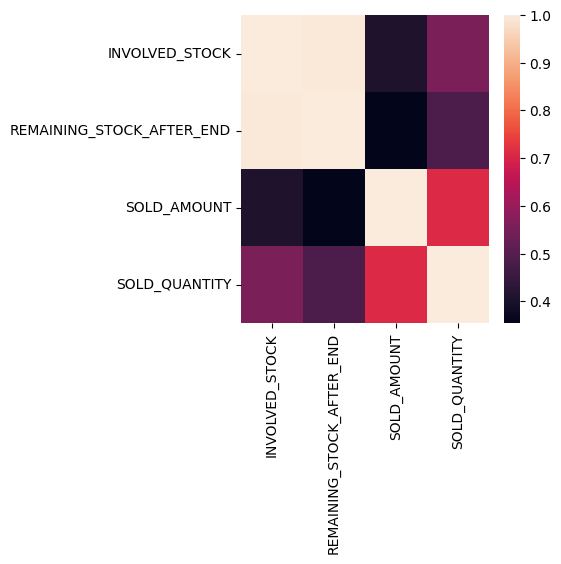

In [56]:
plt.figure(figsize=(4, 4))
sns.heatmap(df_numeric_corr)
;

# Conclusiones